<a href="https://colab.research.google.com/github/phule1812/iurc2/blob/master/first_step_for_velocity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
from google.colab import drive
# drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

In [31]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path/ 'dataset'

if image_path.is_dir():
  print(f'{image_path} directory already exists ... ')
else:
  print(f'{image_path} does not exist, creatin one ...')
  image_path.mkdir(parents = True, exist_ok = True)

# Download dataset
with open(data_path / 'dataset.zip', 'wb') as f:
  request = requests.get('https://github.com/phule1812/iurc2/raw/master/dataset.zip')
  print('Downloading dataset ...')
  f.write(request.content)

# Unzip dataset
with zipfile.ZipFile(data_path / "dataset.zip", 'r') as zip_ref:
  print('Unzipping dataset ...')
  zip_ref.extractall(image_path)

data/dataset directory already exists ... 
Unzipping dataset ...


In [32]:
df_velocity = pd.read_csv('data/dataset/dataset/velocity.csv')
df_current = pd.read_csv('data/dataset/dataset/current.csv')
df_velocity = df_velocity.drop(columns = 'Unnamed: 0')
df_current = df_current.drop(columns = 'Unnamed: 0')

In [33]:
df = pd.concat([df_velocity, df_current], axis = 1)

In [34]:
df.head()

,w3*,w1*,w2*,w3,w1,w2,red_of_first_wheel,red_of_second_wheel,red_of_third_wheel,blue_of_first_wheel,blue_of_second_wheel,blue_of_third_wheel,green_of_first_wheel,green_of_second_wheel,green_of_third_wheel,I3,I1,I2
0,200,200,200,144.692308,158.000000,141.967742,1,0,0,0,1,0,0,0,1,0.664165,0.488095,0.709957
1,200,200,225,147.673469,157.950000,157.680000,1,0,0,0,1,0,0,0,1,0.653846,0.425032,0.857287
2,200,200,250,143.500000,162.000000,181.465116,1,0,0,0,1,0,0,0,1,0.647837,0.394962,0.970985
3,200,200,275,145.800000,168.000000,205.434783,1,0,0,0,1,0,0,0,1,0.561859,0.400314,0.995885
4,200,200,300,150.362069,164.213115,221.282609,1,0,0,0,1,0,0,0,1,0.562024,0.392505,1.105096


### Prediction of v:

In [35]:
X = df[['w1*', 'w2*', 'w3*', 'red_of_first_wheel', 'red_of_second_wheel', 'red_of_third_wheel', 'blue_of_first_wheel', 'blue_of_second_wheel', 'blue_of_third_wheel', 'green_of_first_wheel', 'green_of_second_wheel', 'green_of_third_wheel']]

In [36]:
# y = df[['w1', 'w2', 'w3']]
y = df[['w3']]

In [37]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [39]:
def prediction_of_w3(model, X_train, y_train, X_test, y_test):
  #create pipeline of model
  pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', model)
  ])

  # fit model
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)
  error = mean_squared_error(y_pred, y_test)
  print(f'Error of {model} : {error}')

  # plot real vs predicted values
  y_pred = pd.DataFrame(y_pred, columns = ['w3_pred'])
  df_concat = pd.concat([y_test.reset_index(), y_pred], axis = 1)

  df_concat['w3'].plot(kind='line', figsize=(8, 4), label='w1')
  df_concat['w3_pred'].plot(kind='line', figsize=(8, 4), label='w1_pred')
  plt.legend()
  plt.title(f'Real w3 vs predicted w3 with {model}')
  plt.show()

  return error

Error of LinearRegression() : 26.729847183411557


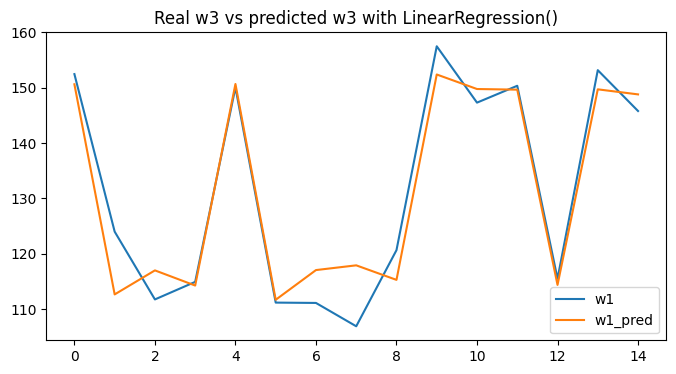

In [40]:
#Linear Regression model
linear_regression_error = prediction_of_w3(LinearRegression(), X_train, y_train, X_test, y_test)

Error of DecisionTreeRegressor() : 24.64647634603232


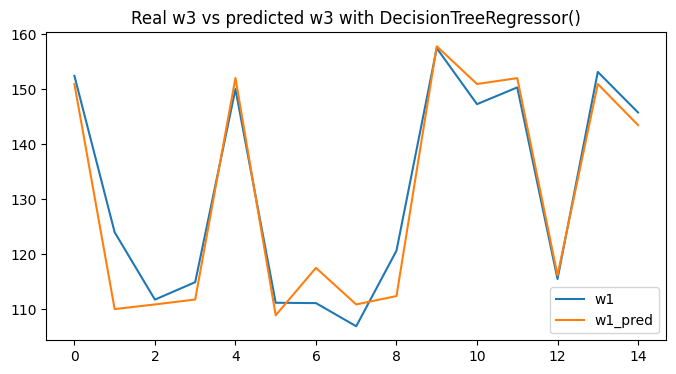

In [41]:
# DecisionTree Regressor model
decision_tree_regressor_error = prediction_of_w3(DecisionTreeRegressor(), X_train, y_train, X_test, y_test)

Error of RandomForestRegressor() : 22.049301366184647


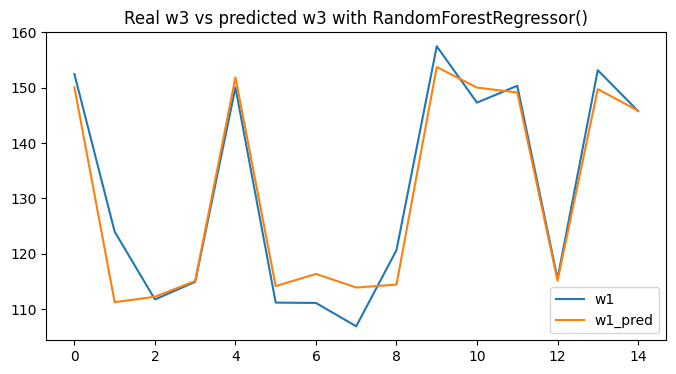

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor model
random_forest_regressor_error = prediction_of_w3(RandomForestRegressor(), X_train, y_train, X_test, y_test)

Error of GradientBoostingRegressor() : 26.430606328844178


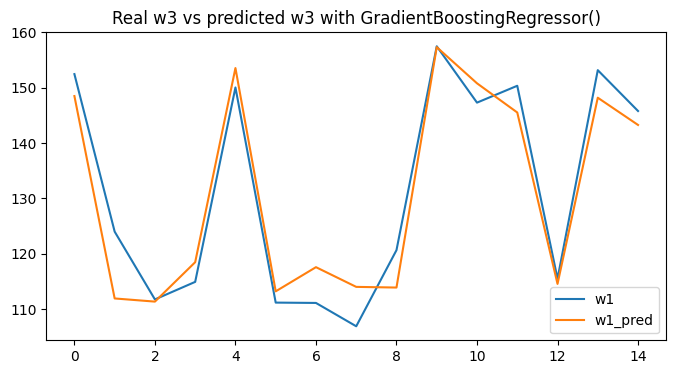

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regression model
gradient_boosting_regression_error = prediction_of_w3(GradientBoostingRegressor(), X_train, y_train, X_test, y_test)

Error of SVR() : 47.021696154528364


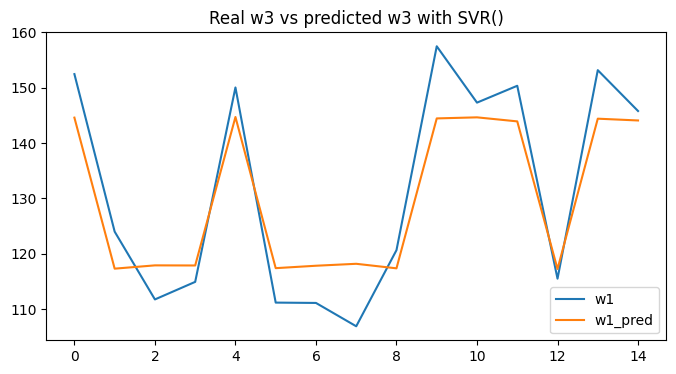

In [44]:
from sklearn.svm import SVR

# Super Vector Regressor

super_vector_regressor_error = prediction_of_w3(SVR(), X_train, y_train, X_test, y_test)

Error of KNeighborsRegressor() : 18.537141917293855


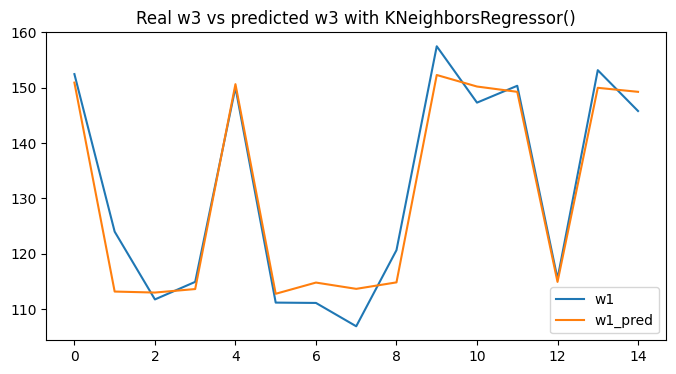

In [45]:
from sklearn.neighbors import KNeighborsRegressor

# K-Nearest Neighbors Regression

k_nearest_neightbors_regressor_error = prediction_of_w3(KNeighborsRegressor(), X_train, y_train, X_test, y_test)

In [46]:
df_error = pd.DataFrame({
    'Linear_Regression' : [linear_regression_error],
    'Decision_Tree_Regressor' : [decision_tree_regressor_error],
    'Random Forest Regressor' : [random_forest_regressor_error],
    'Gradient Boosting Regression' : [gradient_boosting_regression_error],
    'Super Vector Regressor' : [super_vector_regressor_error],
    'K-Nearest Neighbors Regression' : [k_nearest_neightbors_regressor_error]
})

In [47]:
df_error = df_error.T
df_error

,0
Linear_Regression,26.729847
Decision_Tree_Regressor,24.646476
Random Forest Regressor,22.049301
Gradient Boosting Regression,26.430606
Super Vector Regressor,47.021696
K-Nearest Neighbors Regression,18.537142


In [48]:
df_3d = df[['w1*', 'w2*', 'w3']]

In [49]:
df_3d

,w1*,w2*,w3
0,200,200,144.692308
1,200,225,147.673469
2,200,250,143.500000
3,200,275,145.800000
4,200,300,150.362069
5,225,200,144.000000
6,225,225,147.500000
7,225,250,150.979592
8,225,275,153.183673
9,225,300,152.052632


In [50]:
df_3d_plus = df_3d[(df_3d['w1*'] > 0) & (df_3d['w2*'] > 0)]

In [51]:
df_3d_minus = df_3d[(df_3d['w1*'] < 0) & (df_3d['w2*'] < 0)]
df_3d_minus

,w1*,w2*,w3
25,-200,-200,106.897959
26,-200,-225,111.115385
27,-200,-250,117.529412
28,-200,-275,117.450000
29,-200,-300,112.339286
30,-225,-200,111.750000
31,-225,-225,115.815789
32,-225,-250,120.656250
33,-225,-275,112.395349
34,-225,-300,111.983607


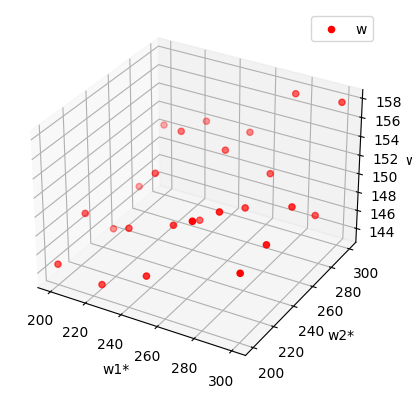

In [52]:
ax = plt.figure().add_subplot(projection='3d')

# Prepare arrays x, y, z
z = df_3d_plus['w3']
x = df_3d_plus['w1*']
y = df_3d_plus['w2*']

ax.scatter(x, y, z, label='w', c='r', marker='o')
ax.legend()
# Đặt tên cho các trục
ax.set_xlabel('w1*')
ax.set_ylabel('w2*')
ax.set_zlabel('w3')
plt.show()

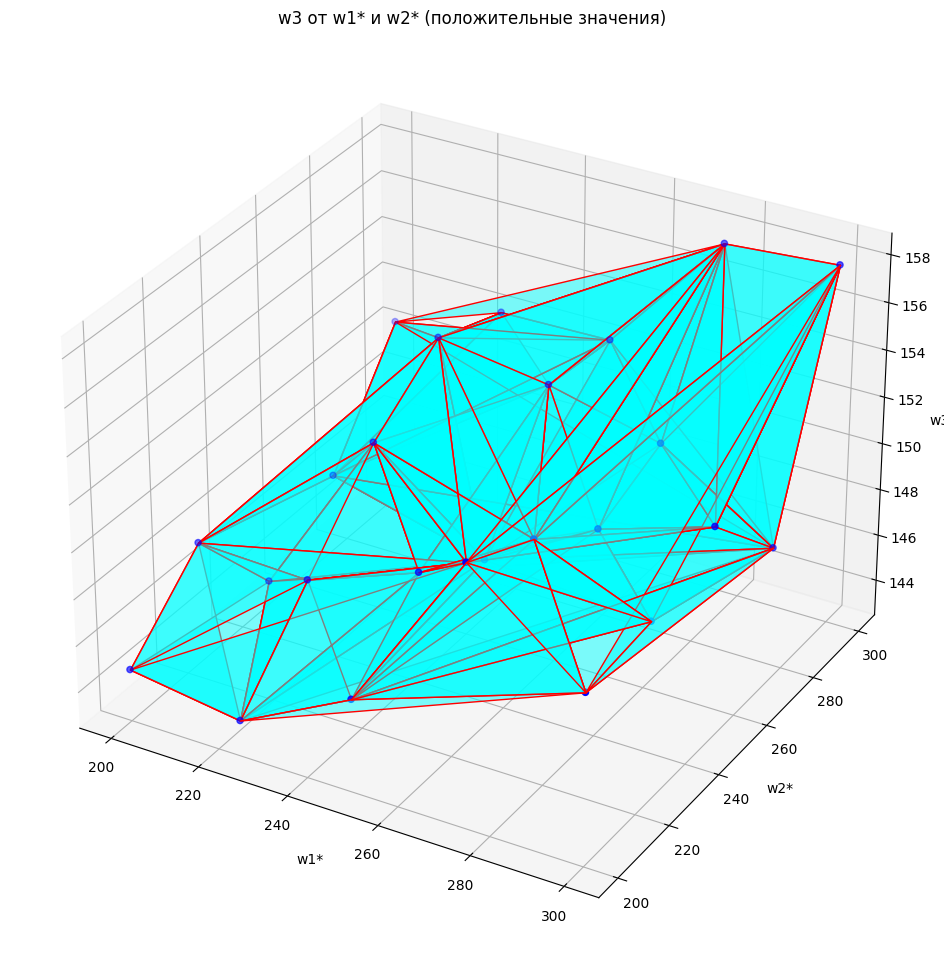

In [53]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import Delaunay
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
points = df_3d_plus.to_numpy()
tri = Delaunay(points)
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o', label='Points')
for simplex in tri.simplices:
    vertices = points[simplex]
    ax.add_collection3d(Poly3DCollection([vertices], facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.5))

ax.set_xlabel('w1*')
ax.set_ylabel('w2*')
ax.set_zlabel('w3')
ax.set_title('w3 от w1* и w2* (положительные значения)')
plt.show()

In [54]:
import pandas as pd
import plotly.graph_objects as go
from scipy.spatial import Delaunay

fig = go.Figure()

points = df_3d_plus.to_numpy()
tri = Delaunay(points)

fig.add_trace(go.Scatter3d(x=points[:, 0], y=points[:, 1], z=points[:, 2], mode='markers', marker=dict(color='blue'), name='Points'))

for simplex in tri.simplices:
    vertices = points[simplex]
    fig.add_trace(go.Mesh3d(x=vertices[:, 0], y=vertices[:, 1], z=vertices[:, 2], color='cyan', opacity=0.5))

fig.show()

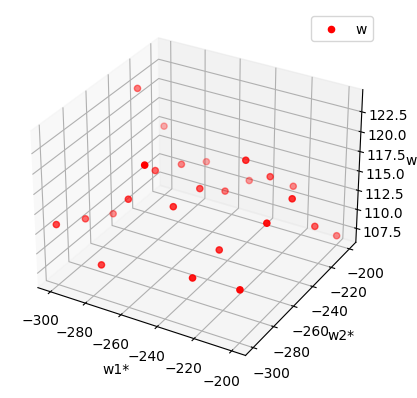

In [55]:
ax = plt.figure().add_subplot(projection='3d')

# Prepare arrays x, y, z
z = df_3d_minus['w3']
x = df_3d_minus['w1*']
y = df_3d_minus['w2*']

ax.scatter(x, y, z, label='w', c='r', marker='o')
ax.legend()
# Đặt tên cho các trục
ax.set_xlabel('w1*')
ax.set_ylabel('w2*')
ax.set_zlabel('w3')
plt.show()

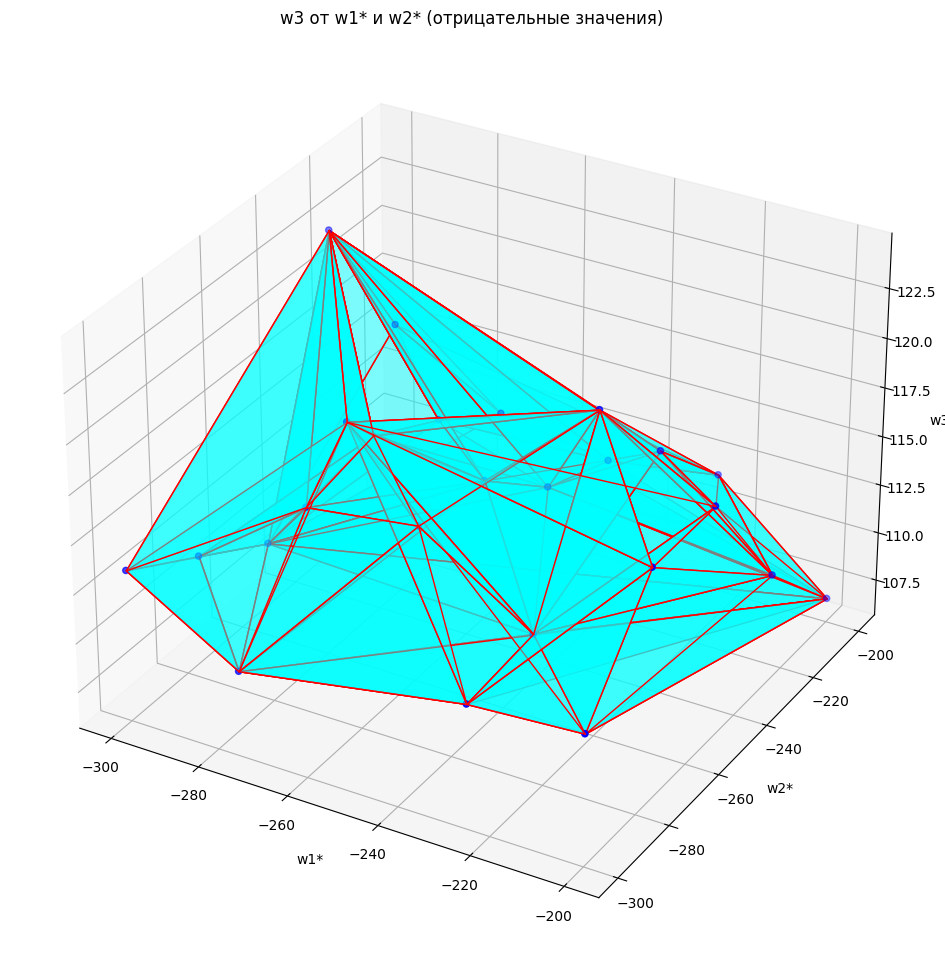

In [56]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import Delaunay
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
points = df_3d_minus.to_numpy()
tri = Delaunay(points)
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o', label='Points')
for simplex in tri.simplices:
    vertices = points[simplex]
    ax.add_collection3d(Poly3DCollection([vertices], facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.5))

ax.set_xlabel('w1*')
ax.set_ylabel('w2*')
ax.set_zlabel('w3')
ax.set_title('w3 от w1* и w2* (отрицательные значения)')
plt.show()

In [57]:
import pandas as pd
import plotly.graph_objects as go
from scipy.spatial import Delaunay

fig = go.Figure()

points = df_3d_minus.to_numpy()
tri = Delaunay(points)

fig.add_trace(go.Scatter3d(x=points[:, 0], y=points[:, 1], z=points[:, 2], mode='markers', marker=dict(color='blue'), name='Points'))

for simplex in tri.simplices:
    vertices = points[simplex]
    fig.add_trace(go.Mesh3d(x=vertices[:, 0], y=vertices[:, 1], z=vertices[:, 2], color='cyan', opacity=0.5))

fig.show()